In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io 
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


Excerise 1: Fourier Transform of Images: we compare the Fourier transform of two different images. 
The following function computes Fourier transform of a given image. Note that low frequencies are shifted to the center of the transformed image.  

In [2]:
def get_fourier_spectrum(img): 
    plt.subplot(121), plt.imshow(img,cmap='gray')
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift)) # compute the magnitude spectrum of the fourier spectrum
    plt.subplot(122), plt.imshow(magnitude_spectrum,cmap ='gray')
    return fshift

Here we plot the magnitude spectrum of two different images. The question is: 
<ul>
  <li>1.a: what is the difference between these two spectrums?</li>
  <li>1.b: What is the source of this difference in spectrums?</li>
</ul>

Solutions:
<ul>
  <li>1.a: The high-frequency region of the spectrum of the barbara image is brighter than that of boat image, which means that the barbara image contains more high-frequency component than the boat image. </li>
  <li>1.b: The source of the high-frequency component in the barbara image comes from the stripes pattern on the women's clothes as well as the check pattern on the table cloth. </li>
</ul>



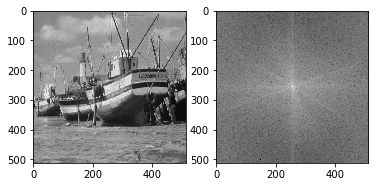

In [3]:
img_boat = io.imread("boat.png")
fshift_boat = get_fourier_spectrum(img_boat)

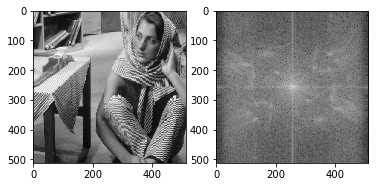

In [4]:
img_barbara = io.imread("barbara.png")
fshift_barbar = get_fourier_spectrum(img_barbara)

You are given the following mask matrix, that you will use it in the next excercise.

0.956935882568


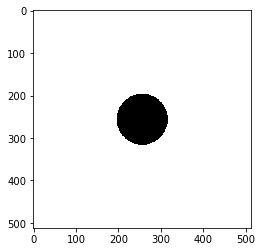

In [5]:
def get_mask(nrows,ncols):
    row, col = np.ogrid[:nrows, :ncols]
    cnt_row, cnt_col = nrows / 2, ncols / 2
    radius = 60
    outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > radius ** 2)
    return outer_disk_mask
mask = get_mask(img_boat.shape[0],img_boat.shape[1])
plt.imshow(mask,cmap = 'gray')
print(sum(mask == True)/(1.0*img_boat.shape[0]*img_boat.shape[1]))

Excercise 2: Use the shifted fourier spectrum and also the above mask to implement a lowpass filtering. Then use inverse fourier transform to recovered the image after lowpass filtering. Apply the lowpass filtering to boat's image and the barbara image. Compared the images before and after lowpass filtering.  
<ul>
  <li>1.a: For which image lowpass filtered imaged is more similar to the orginal image? Why for this image lowpass filtering is more loose?</li>
  <li>1.b: For which image do you suggest lowpass filtering as a sparse coding techinque? Justify your choice.</li>
</ul>

In [6]:
def get_masked_image(fshift_masked): 
    magnitude_spectrum = np.zeros(fshift_masked.shape)
    magnitude_spectrum[fshift_masked!=0] = 20*np.log(np.abs(fshift_masked[fshift_masked!=0]))
    plt.subplot(121), plt.imshow(magnitude_spectrum,cmap ='gray')
    f = np.fft.fftshift(fshift_masked)
    img = np.fft.ifft2(f)
    img = np.abs(img)
    plt.subplot(122), plt.imshow(img,cmap ='gray')
    return img

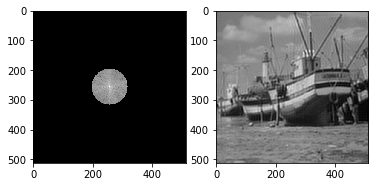

In [7]:
mask = get_mask(img_boat.shape[0],img_boat.shape[1])
fshift_boat_masked = fshift_boat * (1 - mask)
boat_masked = get_masked_image(fshift_boat_masked)

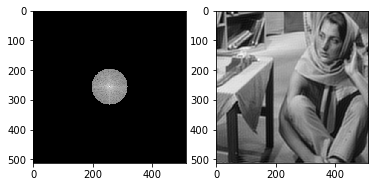

In [8]:
mask = get_mask(img_barbara.shape[0],img_barbara.shape[1])
fshift_barbar_masked = fshift_barbar * (1 - mask)
barbara_masked = get_masked_image(fshift_barbar_masked)

Solutions: 
<ul>
  <li>1.a: The lowpass-filtered boat image is more similar to the original image. Because most of information of the boat image are in the low-frequency region as can be observed from its spectrum and the low-pass filtering filter out the high-frequency component, so more information is kept for the boat image than the barbara image after low-pass filtering hence more similar to the original one. (As can be seen, the patterns corresponding to the high-frequency components disappear after low-pass filtering in the babara image.) </li>
  <li>1.b: The low-pass filtering can be used as a sparse coding technique for the boat image. Sparse coding preserves the components with the largest coefficient values. In the boat image, the low-frequency components are the ones with higher coefficients and they are preserved after low-pass filtering; whereas in the barbara image, some high-frequency compoents also have large coefficient values which are not preserved after low-pass filtering but should be kept with sparse coding technique. In that sense, the low-pass filtering is more similar to the sparse coding technique for the boat image. </li>
</ul>